<h1>Practicing with Resnet</h1>
<p>- Load ResNet50 from TensorFlow or PyTorch</p>
<p>- Input an image → Output a feature vector (2048-dim)</p>

<h3>Practicing Image —> Prediction</h3>
<p>(not a feature vector)</p>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from keras.utils import img_to_array
from keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications import resnet50, ResNet50

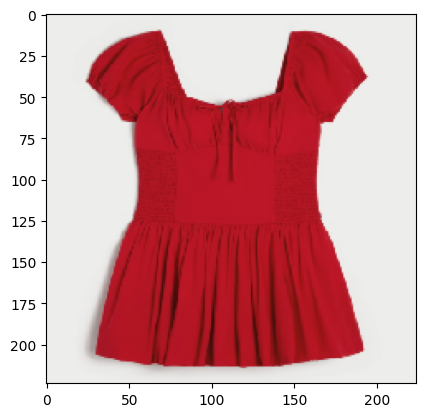

In [5]:
#creating image with specified size
original_img = load_img("red_dress.png", target_size=(224, 224))
plt.imshow(original_img)

In [6]:
#converts the image to array format
array_img = img_to_array(original_img)

#adds a dimension that represents the number of images in the "batch"
input_array = np.expand_dims(array_img, axis=0)
print(input_array.shape)

(1, 224, 224, 3)


In [7]:
#outputs preprocessed image so that it can be classified
img = resnet50.preprocess_input(input_array.copy())

#creates the pretrained model
#sets the weights to the weights set by a set of training data
pretrained_model = resnet50.ResNet50(weights="imagenet")

In [8]:
predictions = pretrained_model.predict(img)

#putting predictions in readable format
label = decode_predictions(predictions)

#printing only the prediction
for i in range(len(label[0])):
    print(label[0][i][1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
velvet
maillot
miniskirt
jersey
wool


<p>Results: inaccurate at making predictions (both giraffes & dresses were tested)</p>

<h3>Creating the Feature Vector</h3>

In [7]:
feature_extractor = ResNet50(weights="imagenet")
feature_vector = feature_extractor.predict(img)
print(feature_vector)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
[[6.78261847e-09 2.26365362e-08 2.43145308e-07 1.34328889e-06
  4.25186997e-08 6.71860425e-06 8.72547332e-07 4.13664493e-05
  2.28029312e-05 1.30959094e-01 4.81809423e-07 2.56646029e-08
  2.83579400e-08 8.29664781e-09 1.34619116e-08 4.88485483e-08
  5.44481544e-08 7.42596962e-09 8.23996231e-07 7.12155757e-09
  1.23509110e-07 6.00011981e-06 2.96894456e-07 1.35011323e-05
  5.63991307e-06 3.83178104e-07 6.50978927e-06 6.00155587e-08
  1.09659902e-06 1.15661507e-07 3.03643537e-06 5.43805641e-07
  3.00446186e-06 1.13168937e-06 2.04067283e-06 9.06039261e-08
  5.00919668e-06 6.06197759e-08 1.86560384e-04 2.94204324e-06
  1.63583053e-07 8.02922004e-05 4.78863285e-06 5.97357030e-06
  4.05145602e-06 4.75548150e-04 1.71318914e-06 1.70344833e-06
  1.40138754e-05 5.26128351e-05 7.13916279e-07 4.20607557e-06
  4.39663097e-08 4.72603091e-07 1.23425052e-05 1.31636611e-07
  7.13212614e-07 4.87351031e-08 2.80714715e-07 1.12644875e-06
  1.02156957e-06 2.97586979e-07

<h1>VGG16 Cosine Similarity Search</h1>

In [11]:
import os
import h5py
from numpy import linalg as LA
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from scipy import spatial

In [12]:
#creating model
model = VGG16(weights="imagenet", input_shape=(224, 224, 3), pooling="max", include_top=False)

In [13]:
#creates a feature vector
input_features = model.predict(img)

#normalizing the vector to create the unit vector
normalized_input_features = input_features[0]/LA.norm(input_features[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


In [14]:
images_path = "clothes/"

#puts images from the file into a list? double-check what exactly this code does
img_list = [os.path.join(images_path, f) for f in os.listdir(images_path)]

In [15]:
features = []
names = []
for im in os.listdir(images_path):
    if im == ".DS_Store":
        continue

    print("extracting features from image - ", im)
    im_img = load_img(images_path+im, target_size=(224, 224))
    im_array_img = img_to_array(im_img)
    im_input_array = np.expand_dims(im_array_img, axis=0)
    im_preprocessed = preprocess_input(im_input_array)
    im_input_features = model.predict(im_preprocessed)
    im_normalized_input_features = im_input_features[0]/LA.norm(im_input_features[0])
    
    features.append(im_normalized_input_features)
    names.append(im)

features = np.array(features)

#creating directory for storing extracted features
output = "CNNFeatures.h5"
print("writing feature extraction results to this h5 file")

h5f = h5py.File(output, "w")
h5f.create_dataset("dataset_1", data=features)
h5f.create_dataset("dataset_2", data=np.bytes_(names))
h5f.close()


extracting features from image -  yellow_tank.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
extracting features from image -  hat.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
extracting features from image -  black_dress.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
extracting features from image -  baggy_jeans.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
extracting features from image -  white_hoodie.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
extracting features from image -  white_graphictee.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
extracting features from image -  graphic_offshoulder.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
extracting features from image -  floral_top.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
extracting features from image -  pink_buttons.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
extracting features from image -  blue_tee.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
extracting features from image -  red_dress3.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
extracting features

In [24]:
h5f_read = h5py.File("CNNFeatures.h5", "r")
feats = h5f_read['dataset_1'][:]
imgNames = h5f_read['dataset_2'][:]

scores = []
for i in range(feats.shape[0]):
    score = 1-spatial.distance.cosine(normalized_input_features, feats[i])
    scores.append(score)
scores = np.array(scores)

#sorting scores from greatest to least
rank_ID = np.argsort(scores)[::-1]
rank_score = scores[rank_ID]

#get top matches
top_n = 3
top_matches = rank_ID[:top_n]
top_scores = rank_score[:top_n]

#printing top matches
print(f"Top {top_n} matches with similarity scores:")
for i, (image_id, score) in enumerate(zip(top_matches, top_scores)):
    image_name = imgNames[image_id].decode('utf-8') if isinstance(imgNames[image_id], bytes) else imgNames[image_id]
    print(f"{i+1}. Image: {image_name}, Score: {score:.4f}")


Top 3 matches with similarity scores:
1. Image: red_dress3.png, Score: 0.7906
2. Image: red_dress2.png, Score: 0.7350
3. Image: black_dress.png, Score: 0.7163
